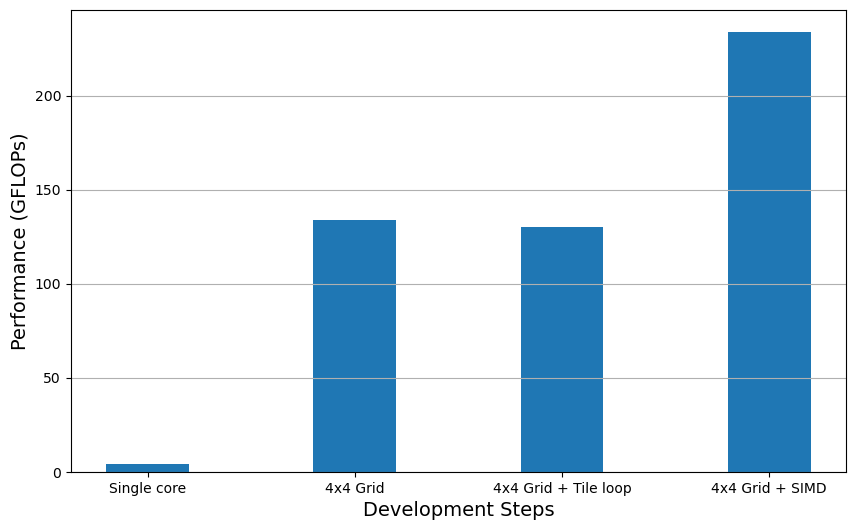

In [1]:
import matplotlib.pyplot as plt

# Data
steps = ['Single core', '4x4 Grid', '4x4 Grid + Tile loop', '4x4 Grid + SIMD']
performance = [4, 134, 130, 234]

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(steps, performance, width=0.4)

# Adding titles and labels
# plt.title('Performance Improvement Along the Development Process', fontsize=16)
plt.xlabel('Development Steps', fontsize=14)
plt.ylabel('Performance (GFLOPs)', fontsize=14)

# Adding grid
plt.grid(axis='y')

# Display the plot
plt.savefig("img/pi")
plt.show()


In [2]:
import pandas as pd
def load_out(file_path):
    re = []
    with open(file_path, 'r') as file:
        for line in file.readlines():
            if line.startswith('@'):
                parts = line.split()
                try:
                    x = int(parts[3]) 
                    y = int(parts[4])
                    num_processors = x * y
                    geometry = (x,y)
                    runtime = float(parts[7])
                    performance = float(parts[8])
                    re.append((num_processors, geometry, runtime, performance))
                except (IndexError, ValueError):
                    continue
    df = pd.DataFrame(re, columns=['num_processors', 'geometry', "runtime", 'performance'])
    # print(df)
    df = df.loc[df.groupby('num_processors')['performance'].idxmax()]
    df['speedup'] = df['runtime'].iloc[0] / df['runtime']
    df['efficiency'] = df['speedup'] / df['num_processors'] *df['num_processors'].iloc[0]
    return df

In [3]:
N0_x = 24
N0_apf = load_out('../N0.apf.31066026.out')
N0_apf_k = load_out('../N0.apf_k.31065942.out')
N0_ref = load_out('../N0.ref.31052475.out')
N0_ref_k = load_out('../N0.ref_k.31052478.out')

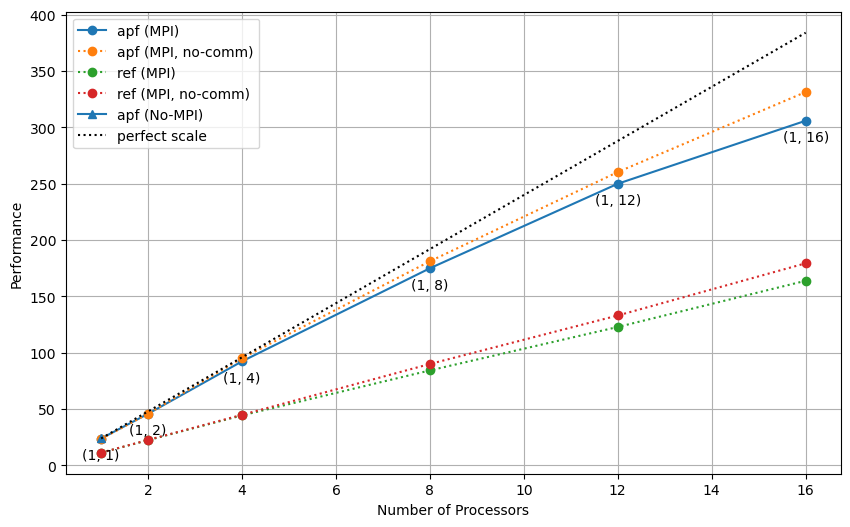

In [4]:
# Plotting the data
plt.figure(figsize=(10, 6))

plt.plot(N0_apf['num_processors'], N0_apf['performance'], 
         marker='o', 
         color = "C0", label = "apf (MPI)")
plt.plot(N0_apf_k['num_processors'], N0_apf_k['performance'], 
         marker='o', linestyle=":", 
         color = "C1", label = "apf (MPI, no-comm)")
plt.plot(N0_ref['num_processors'], N0_ref['performance'], 
         marker='o', linestyle=":",
         color = "C2", label = "ref (MPI)")
plt.plot(N0_ref_k['num_processors'], N0_ref_k['performance'], 
         marker='o', linestyle=":",
         color = "C3", label = "ref (MPI, no-comm)")
plt.plot(1, N0_x, marker='^', label="apf (No-MPI)")
plt.plot([1,16], [N0_x, N0_x*16],  linestyle=":", c='black', label = "perfect scale")
# Annotate the points with the geometry
for i, row in N0_apf.iterrows():
    plt.annotate(row['geometry'], (row['num_processors'], row['performance']), textcoords="offset points", xytext=(0,-15), ha='center')

plt.xlabel('Number of Processors')
plt.ylabel('Performance')
plt.legend()
# plt.title('Number of Processors vs Performance with Geometry Annotation')
plt.grid(True)
plt.savefig("img/N0")
plt.show()

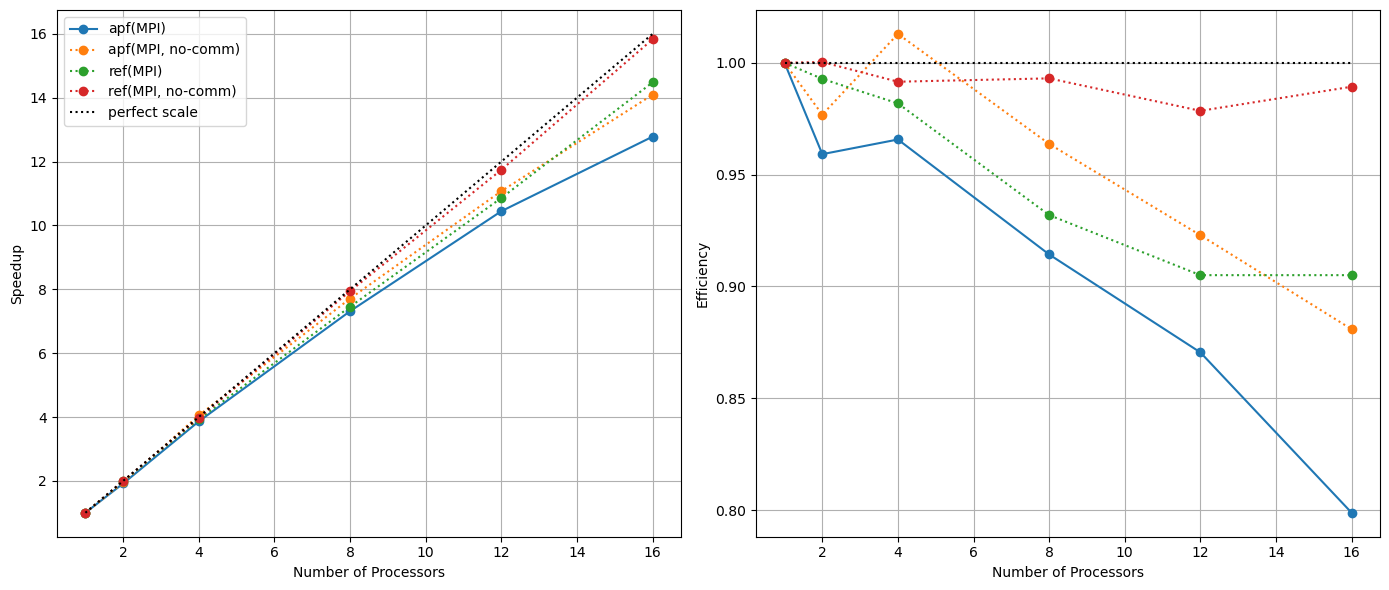

In [5]:
# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Speedup plot
ax1.plot(N0_apf['num_processors'], N0_apf['speedup'], 
         marker='o', 
         color='C0', label="apf(MPI)")
ax1.plot(N0_apf_k['num_processors'], N0_apf_k['speedup'], 
         marker='o', linestyle=":",
         color='C1', label="apf(MPI, no-comm)")
ax1.plot(N0_ref['num_processors'], N0_ref['speedup'], 
         marker='o', linestyle=":", 
         color='C2', label="ref(MPI)")
ax1.plot(N0_ref_k['num_processors'], N0_ref_k['speedup'], 
         marker='o', linestyle=":", 
         color='C3', label="ref(MPI, no-comm)")
ax1.plot([1,16], [1,16], linestyle=":", color="black", label='perfect scale')

ax1.set_xlabel('Number of Processors')
ax1.set_ylabel('Speedup')
ax1.grid(True)
ax1.legend()
# Efficiency plot
ax2.plot(N0_apf['num_processors'], N0_apf['efficiency'], 
         marker='o', 
         color='C0', label="apf(MPI)")
ax2.plot(N0_apf_k['num_processors'], N0_apf_k['efficiency'], 
         marker='o', linestyle=":",
         color='C1', label="apf(MPI, no-comm)")
ax2.plot(N0_ref['num_processors'], N0_ref['efficiency'], 
         marker='o', linestyle=":", 
         color='C2', label="ref(MPI)")
ax2.plot(N0_ref_k['num_processors'], N0_ref_k['efficiency'], 
         marker='o', linestyle=":", 
         color='C3', label="ref(MPI, no-comm)")
ax2.plot([1,16], [1,1], linestyle=":", color="black")
ax2.set_xlabel('Number of Processors')
ax2.set_ylabel('Efficiency')
ax2.grid(True)

plt.tight_layout()
# plt.legend()
plt.savefig("img/N0_scale")
plt.show()

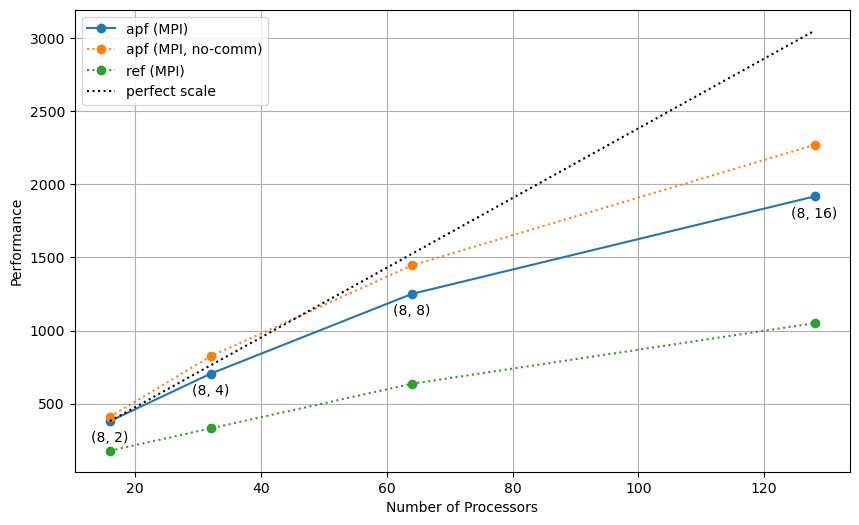

In [6]:
N1_apf = load_out('../N1.apf.31066027.out')
N1_apf_k = load_out('../N1.apf_k.31089159.out')
N1_ref = load_out('../N1.ref.31112023.out')

# Plotting the data
plt.figure(figsize=(10, 6))

plt.plot(N1_apf['num_processors'], N1_apf['performance'], 
         marker='o', 
         color = "C0", label = "apf (MPI)")
plt.plot(N1_apf_k['num_processors'], N1_apf_k['performance'], 
         marker='o', linestyle=":", 
         color = "C1", label = "apf (MPI, no-comm)")
plt.plot(N1_ref['num_processors'], N1_ref['performance'], 
         marker='o', linestyle=":", 
         color = "C2", label = "ref (MPI)")
plt.plot([16,128], [N1_apf['performance'].iloc[0], 8*N1_apf['performance'].iloc[0]], 
         linestyle=":", c='black', label = "perfect scale")
# Annotate the points with the geometry
for i, row in N1_apf.iterrows():
    plt.annotate(row['geometry'], (row['num_processors'], row['performance']), textcoords="offset points", xytext=(0,-15), ha='center')

plt.xlabel('Number of Processors')
plt.ylabel('Performance')
plt.legend()
# plt.title('Number of Processors vs Performance with Geometry Annotation')
plt.grid(True)
plt.savefig("img/N1")
plt.show()

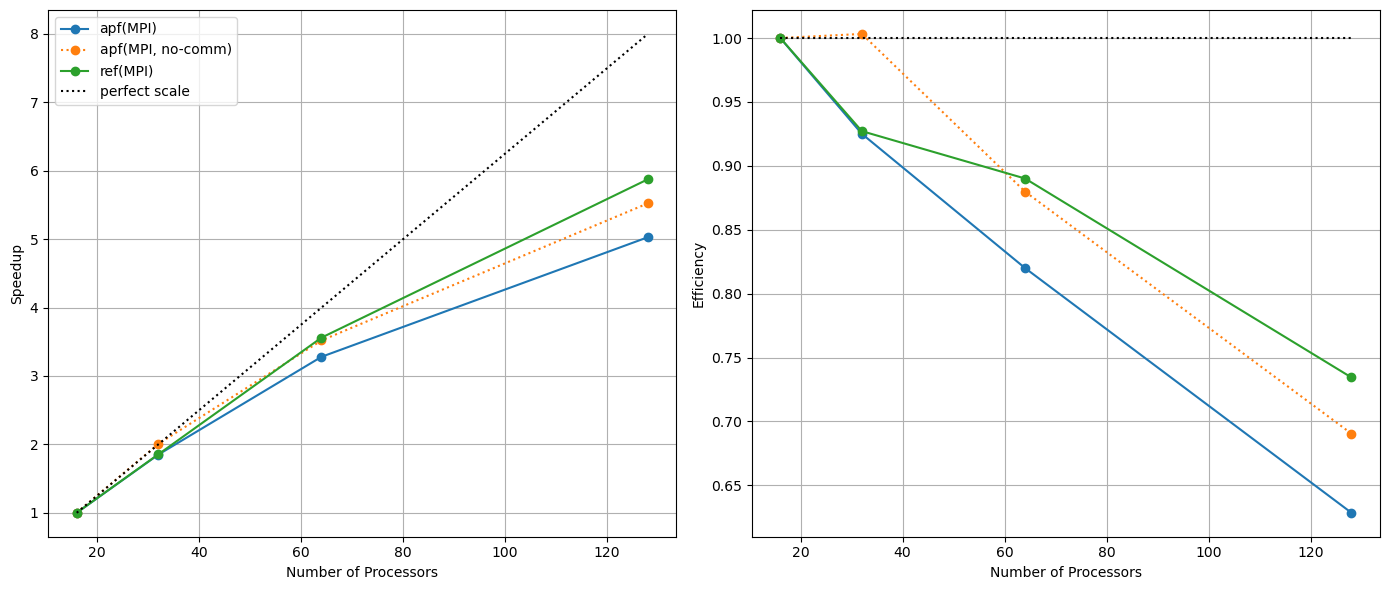

In [14]:
# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Speedup plot
ax1.plot(N1_apf['num_processors'], N1_apf['speedup'], 
         marker='o', 
         color='C0', label="apf(MPI)")
ax1.plot(N1_apf_k['num_processors'], N1_apf_k['speedup'], 
         marker='o', linestyle=":",
         color='C1', label="apf(MPI, no-comm)")
ax1.plot(N1_ref['num_processors'], N1_ref['speedup'], 
         marker='o', 
         color='C2', label="ref(MPI)")
ax1.plot([16,128], [1,8], linestyle=":", color="black", label='perfect scale')

ax1.set_xlabel('Number of Processors')
ax1.set_ylabel('Speedup')
ax1.grid(True)
ax1.legend()
# Efficiency plot
ax2.plot(N1_apf['num_processors'], N1_apf['efficiency'], 
         marker='o', 
         color='C0', label="apf(MPI)")
ax2.plot(N1_apf_k['num_processors'], N1_apf_k['efficiency'], 
         marker='o', linestyle=":",
         color='C1', label="apf(MPI, no-comm)")
ax2.plot(N1_ref['num_processors'], N1_ref['efficiency'], 
         marker='o', 
         color='C2', label="ref(MPI)")
ax2.plot([16,128], [1,1], linestyle=":", color="black")
ax2.set_xlabel('Number of Processors')
ax2.set_ylabel('Efficiency')
ax2.grid(True)

plt.tight_layout()
# plt.legend()
plt.savefig("img/N1_scale")
plt.show()

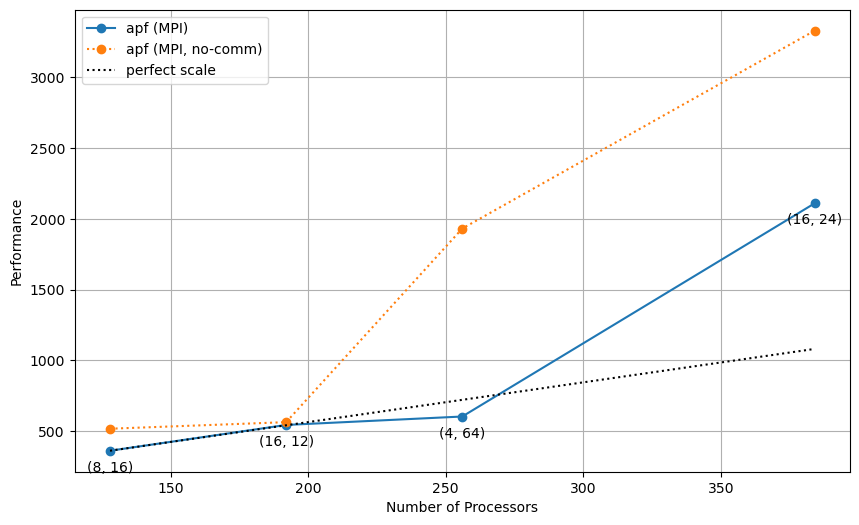

In [8]:
N2_apf = load_out('../N2.apf.31070424.out')
N2_apf_k = load_out('../N2.apf_k.31089163.out')
# Plotting the data
plt.figure(figsize=(10, 6))

plt.plot(N2_apf['num_processors'], N2_apf['performance'], 
         marker='o', label = "apf (MPI)")
plt.plot(N2_apf_k['num_processors'], N2_apf_k['performance'], 
         marker='o', linestyle=":", label = "apf (MPI, no-comm)")
plt.plot([128,384], [N2_apf['performance'].iloc[0], 3*N2_apf['performance'].iloc[0]], 
         linestyle=":", c='black', label = "perfect scale")
# Annotate the points with the geometry
for i, row in N2_apf.iterrows():
    plt.annotate(row['geometry'], (row['num_processors'], row['performance']), textcoords="offset points", xytext=(0,-15), ha='center')

plt.xlabel('Number of Processors')
plt.ylabel('Performance')
plt.legend()
# plt.title('Number of Processors vs Performance with Geometry Annotation')
plt.grid(True)
plt.savefig("img/N2")
plt.show()

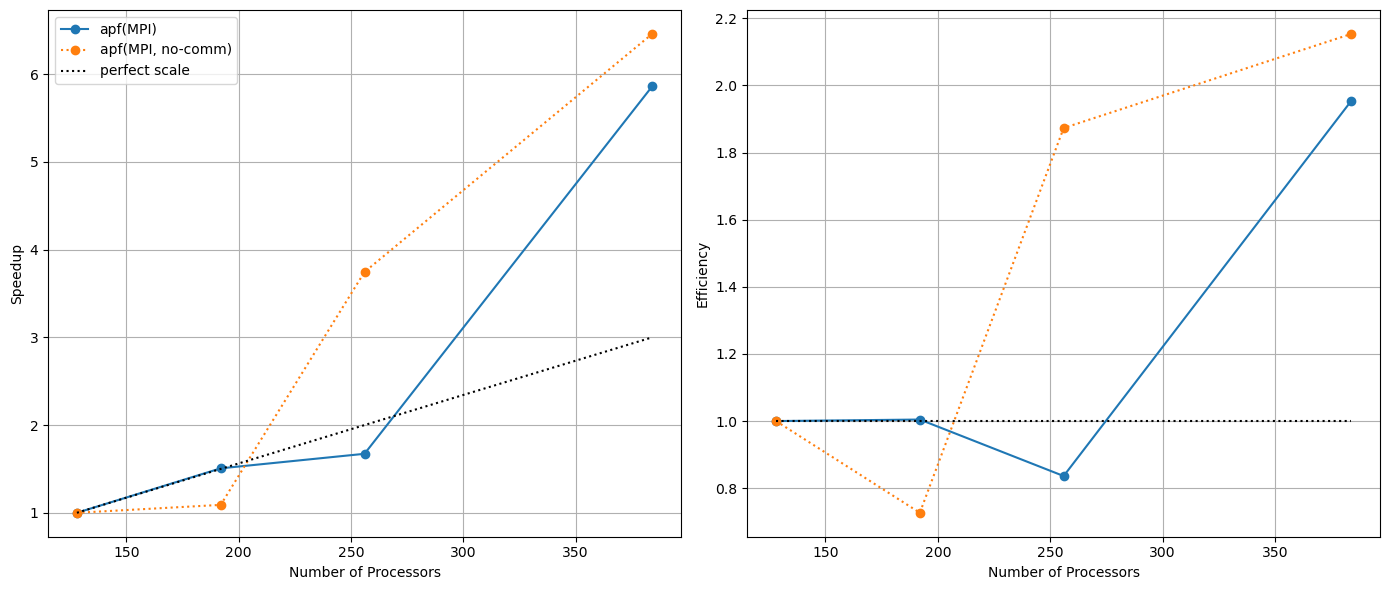

In [9]:
# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Speedup plot
ax1.plot(N2_apf['num_processors'], N2_apf['speedup'], 
         marker='o', 
         color='C0', label="apf(MPI)")
ax1.plot(N2_apf_k['num_processors'], N2_apf_k['speedup'], 
         marker='o', linestyle=":",
         color='C1', label="apf(MPI, no-comm)")
ax1.plot([128,384], [1,3], linestyle=":", color="black", label='perfect scale')

ax1.set_xlabel('Number of Processors')
ax1.set_ylabel('Speedup')
ax1.grid(True)
ax1.legend()
# Efficiency plot
ax2.plot(N2_apf['num_processors'], N2_apf['efficiency'], 
         marker='o', 
         color='C0', label="apf(MPI)")
ax2.plot(N2_apf_k['num_processors'], N2_apf_k['efficiency'], 
         marker='o', linestyle=":",
         color='C1', label="apf(MPI, no-comm)")
ax2.plot([128,384], [1,1], linestyle=":", color="black")
ax2.set_xlabel('Number of Processors')
ax2.set_ylabel('Efficiency')
ax2.grid(True)

plt.tight_layout()
# plt.legend()
plt.savefig("img/N2_scale")
plt.show()

In [10]:
N0_apf, N0_x

(    num_processors geometry  runtime  performance    speedup  efficiency
 0                1   (1, 1)   1.4980        23.92   1.000000    1.000000
 2                2   (1, 2)   0.7809        45.90   1.918299    0.959150
 5                4   (1, 4)   0.3878        92.41   3.862816    0.965704
 9                8   (1, 8)   0.2048       175.00   7.314453    0.914307
 15              12  (1, 12)   0.1434       250.00  10.446304    0.870525
 20              16  (1, 16)   0.1172       305.90  12.781570    0.798848,
 24)

In [11]:
for i, row in N0_apf.iterrows():
    print((24*row['num_processors']-row['performance'])/24/row['num_processors'])

0.0033333333333332624
0.04375000000000003
0.03739583333333337
0.08854166666666667
0.13194444444444445
0.20338541666666674


In [12]:
for i, row in N2_apf.iterrows():
    print(row['num_processors']*row['runtime']/60/60)

1.4165333333333334
1.4101333333333335
1.6938666666666669
0.7250133333333333


In [13]:
N1_apf

,num_processors,geometry,runtime,performance,speedup,efficiency
1,16,"(8, 2)",23.810,381.0,1.000000,1.000000
6,32,"(8, 4)",12.870,705.0,1.850039,0.925019
10,64,"(8, 8)",7.259,1250.0,3.280066,0.820017
14,128,"(8, 16)",4.735,1916.0,5.028511,0.628564
